In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.optimize as opt

## Постановка задачи:
Найти оценки коэффициентов линейной регрессии $$y_i = a + bx_i + e_i$$ используя 20 точек на отрезке $[-1.8; 2]$ с равномерным шагом равным 0.2. Ошибку $e_i$ считать нормально распределённой с параметрами (0,1). 
В качестве эталонной зависимости взять $$y_i = 2 + 2x_i + e_i$$
При построении оценок коэффициентов использовать два критерия: критерий наименьших квадратов и критерий наименьших модулей. Проделать то же самое для выборки, у которой в значения $𝑦_1$ и $𝑦_{20}$ вносятся возмущения 10 и -10


In [2]:
points = 20
start, end = -1.8, 2
step = 0.2
mu, sigma_squared = 0, 1
perturbations = [10, -10]  


coefs = 2, 2

## Метод наименьших квадратов

In [3]:
def LST(x,y):
    b1 = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x * x) - np.mean(x) ** 2)
    b0 = np.mean(y) - b1 * np.mean(x)
    return b0, b1

## Метод наименьших модулей

In [10]:
def LMT(x,y, initial):
    fun = lambda beta: np.sum(np.abs(y - beta[0] - beta[1] * x))
    result = opt.minimize(fun, initial)
    b0 = result['x'][0]
    b1 = result['x'][1]
    return b0,b1


## Оценки коэффициентов линейной регрессии

In [11]:
def find_all_coefs(x,y):
    bs0, bs1 = LST(x, y)
    bm0, bm1 = LMT(x, y, np.array([bs0, bs1]))
    return  bs0, bs1, bm0, bm1

In [15]:
def printResults(type, all_coef):
    bs0, bs1, bm0, bm1 = all_coef
    print(type)
    print("Критерий наименьших квадратов")
    print('a_lst = ' + str(np.around(bs0, decimals=2)))
    print('b_lst = ' + str(np.around(bs1, decimals=2)))
    print("Критерий наименьших модулей")
    print('a_lmt = ' + str(np.around(bm0, decimals=2)))
    print('b_lmt = ' + str(np.around(bm1, decimals=2)))

In [23]:
def criteriaComparison(x, all_coef):
    a_lst, b_lst, a_lmt, b_lmt = all_coef
    model = lambda x: coefs[0] + coefs[1] * x
    lsc = lambda x: a_lst + b_lst * x
    lmc = lambda x: a_lmt + b_lmt * x
    
    sum_lst, sum_lmt = 0, 0
    for el in x:
        y_lst = lsc(el)
        y_lmt = lmc(el)
        y_model = model(el)
        sum_lst += pow(y_model - y_lst, 2)
        sum_lmt += pow(y_model - y_lmt, 2)
        
    if sum_lst < sum_lmt:
        print("LS approximate better! - ", sum_lst, " < ", sum_lmt) 
    else:
        print("LM approximates better! - ", sum_lmt, " < ", sum_lst)

In [57]:
def plotRegression(x, y, type, estimates):
    a_ls, b_ls, a_lm, b_lm = estimates
    plt.scatter(x, y, label="Sample", edgecolor='gray', color = 'gray')
    plt.plot(x, x * (2 * np.ones(len(x))) + 2 * np.ones(len(x)), label='Model', color='black')
    plt.plot(x, x * (b_ls * np.ones(len(x))) + a_ls * np.ones(len(x)), label='Least Squares', color='aqua')
    plt.plot(x, x * (b_lm * np.ones(len(x))) + a_lm * np.ones(len(x)), label='Least Modulo', color='blue')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim([-1.8, 2])
    plt.legend()
    plt.title(type)
    plt.savefig(type + '.png', format='png')
    plt.show()
    plt.close()

## Выборка без возмущений

WITHOUT PERTURBATIONS
Критерий наименьших квадратов
a_lst = 1.82
b_lst = 2.46
Критерий наименьших модулей
a_lmt = 1.85
b_lmt = 2.49
LS approximate better! -  5.921355431686597  <  6.484655863694067


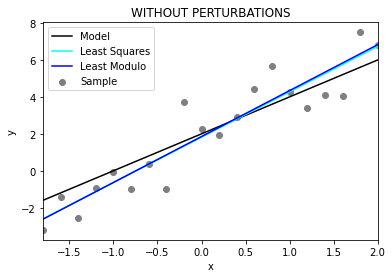

In [58]:
x = np.linspace(start, end, points)
y = coefs[0] + coefs[1] * x + stats.norm(0, 1).rvs(points)
mode = 'WITHOUT PERTURBATIONS'
all_coefs = find_all_coefs(x, y)
printResults(mode, all_coefs)    
criteriaComparison(x, all_coefs)
plotRegression(x, y, mode, all_coefs)
print("\n")

## Выборка c возмущениями

WITH PERTURBATIONS
Критерий наименьших квадратов
a_lst = 1.96
b_lst = 1.03
Критерий наименьших модулей
a_lmt = 1.56
b_lmt = 1.86
LM approximates better! -  4.660476924677528  <  25.511327099183575


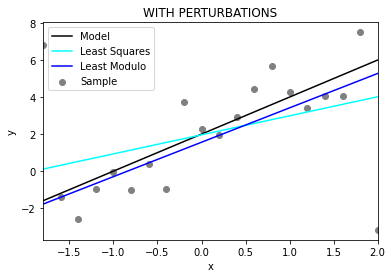

In [59]:
mode = 'WITH PERTURBATIONS'
y[0] += perturbations[0]
y[-1] += perturbations[1]
all_coefs = find_all_coefs(x, y)
printResults(mode, all_coefs)    
criteriaComparison(x, all_coefs)
plotRegression(x, y, mode, all_coefs)
print("\n")